# Connecting To Google Drive

In [2]:
apikey = 'OK8tMupr8C3vWNK6mlsEmyQPAx3UKD4qjDPwI442xIpSDtl3WJ2Yodf6nxVd3sXb '
secret = 'hgT8l2EdTSQf7aeH96J8VhupLRy1CJJ29Omldwsh5AIC1BVZc1HUiR3A7mraL2It'

In [3]:
print('ddd')
print('dd')

ddd
dd


In [4]:
%pip install python-binance pandas mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from binance import Client, ThreadedWebsocketManager,ThreadedDepthCacheManager
import pandas as pd
import numpy as np

In [6]:
client = Client(apikey,secret)

In [7]:
print('saa') #1585

saa


In [8]:
data = ["infy", "tcs", "affle", "dixon", "astral"]
data = ["infy", "tcs", "affle", "dixon", "astral"] 

last_element = data[-3:]
print(last_element)

['affle', 'dixon', 'astral']


In [9]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol,'1d','1546 days ago UTC'))
    if len(frame) > 0:
        frame = frame.iloc[:,:6]
        frame.columns = ['Time','Open','High','Low','Close','Volume']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index,unit='ms')
        frame = frame.astype(float)
        return frame

In [10]:
df_btc=getdailydata('BTCUSDT')

In [11]:
df_btc

,Open,High,Low,Close,Volume
Time,,,,,
2018-05-30,7467.98,7569.00,7260.50,7375.96,32041.583623
2018-05-31,7382.07,7699.00,7327.51,7485.01,30776.063102
2018-06-01,7485.01,7608.55,7355.54,7521.01,28259.124078
2018-06-02,7521.01,7697.33,7437.00,7640.03,26720.690219
2018-06-03,7636.81,7786.69,7600.00,7714.26,27505.158951
...,...,...,...,...,...
2022-08-18,23342.66,23600.00,23111.04,23191.20,144185.970110
2022-08-19,23191.45,23208.67,20783.57,20834.39,283995.877470
2022-08-20,20834.39,21382.85,20761.90,21140.07,183041.683630


In [12]:
df_second=getdailydata('ETHUSDT')
# df_second=getdailydata('XRPUSDT')

In [13]:
df_second

,Open,High,Low,Close,Volume
Time,,,,,
2018-05-30,567.09,585.83,541.20,557.19,1.221323e+05
2018-05-31,557.87,586.73,552.98,577.81,1.001015e+05
2018-06-01,577.81,590.26,564.93,579.00,8.384084e+04
2018-06-02,579.00,599.17,572.90,590.85,8.025815e+04
2018-06-03,590.85,628.81,590.10,619.66,8.412333e+04
...,...,...,...,...,...
2022-08-18,1834.24,1882.37,1821.25,1846.39,6.062540e+05
2022-08-19,1846.39,1848.00,1602.37,1609.01,1.419827e+06
2022-08-20,1609.00,1657.08,1523.67,1576.04,9.146159e+05


In [16]:
df=pd.read_csv('fear&greed.csv')

In [17]:
df_btc.drop(['Open','High','Low','Volume'],inplace=True,axis=1)

In [18]:
df

,Date,fng_value,fng_classification
0,6/7/2022,15,Extreme Fear
1,6/6/2022,13,Extreme Fear
2,6/5/2022,10,Extreme Fear
3,6/4/2022,14,Extreme Fear
4,6/3/2022,10,Extreme Fear
...,...,...,...
1580,2/5/2018,11,Extreme Fear
1581,2/4/2018,24,Extreme Fear
1582,2/3/2018,40,Fear
1583,2/2/2018,15,Extreme Fear


In [19]:
fng_value=df['fng_value'].to_list()

In [20]:


fng_value=fng_value[-1546:]
len(fng_value)

1546

In [21]:
df_btc['fng_value']=fng_value

In [22]:
pred_close=df_second['Close']

In [23]:
df_btc['pred_close']=pred_close

In [24]:
df_btc

,Close,fng_value,pred_close
Time,,,
2018-05-30,7375.96,23,557.19
2018-05-31,7485.01,24,577.81
2018-06-01,7521.01,21,579.00
2018-06-02,7640.03,27,590.85
2018-06-03,7714.26,23,619.66
...,...,...,...
2022-08-18,23191.20,11,1846.39
2022-08-19,20834.39,24,1609.01
2022-08-20,21140.07,40,1576.04


### RSI

In [25]:
#calculating Difference 
change = df_btc["Close"].diff()
change.dropna(inplace=True)

In [26]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [27]:
rsi = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
rsi.describe()

count    1532.000000
mean       52.138294
std        18.175580
min         4.970814
25%        39.092735
50%        51.932440
75%        64.832376
max        96.616924
Name: Close, dtype: float64

In [28]:
df_btc['Rsi']=rsi

In [29]:
df_btc

,Close,fng_value,pred_close,Rsi
Time,,,,
2018-05-30,7375.96,23,557.19,NaN
2018-05-31,7485.01,24,577.81,NaN
2018-06-01,7521.01,21,579.00,NaN
2018-06-02,7640.03,27,590.85,NaN
2018-06-03,7714.26,23,619.66,NaN
...,...,...,...,...
2022-08-18,23191.20,11,1846.39,55.522683
2022-08-19,20834.39,24,1609.01,31.810728
2022-08-20,21140.07,40,1576.04,36.580336


In [30]:
#Replacing with mean
Rsi_mean=df_btc['Rsi'].mean()
df_btc['Rsi']=df_btc['Rsi'].fillna(Rsi_mean)


In [31]:
df_btc

,Close,fng_value,pred_close,Rsi
Time,,,,
2018-05-30,7375.96,23,557.19,52.138294
2018-05-31,7485.01,24,577.81,52.138294
2018-06-01,7521.01,21,579.00,52.138294
2018-06-02,7640.03,27,590.85,52.138294
2018-06-03,7714.26,23,619.66,52.138294
...,...,...,...,...
2022-08-18,23191.20,11,1846.39,55.522683
2022-08-19,20834.39,24,1609.01,31.810728
2022-08-20,21140.07,40,1576.04,36.580336


### sma,lower_bb,upper_bb

In [32]:
##Calculating SMA values In this part, we are going to calculate the SMA values 
#of altcoin with the number of periods as 20.

def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

df_btc['sma_20'] = sma(df_second['Close'], 20)
df_btc.tail()

,Close,fng_value,pred_close,Rsi,sma_20
Time,,,,,
2022-08-18,23191.20,11,1846.39,55.522683,1776.8555
2022-08-19,20834.39,24,1609.01,31.810728,1772.4560
2022-08-20,21140.07,40,1576.04,36.580336,1767.3520
2022-08-21,21515.61,15,1618.13,38.005270,1766.7445
2022-08-22,21426.14,30,1602.37,31.283917,1765.3175


In [33]:
#Calculating Bollinger Bands: In this part, we are going to calculate 
#the Bollinger Bands values of Tesla using the SMA values which we have created earlier.
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df_btc['upper_bb'], df_btc['lower_bb'] = bb(df_btc['pred_close'], df_btc['sma_20'], 20)
df_btc.head(2)

,Close,fng_value,pred_close,Rsi,sma_20,upper_bb,lower_bb
Time,,,,,,,
2018-05-30,7375.96,23,557.19,52.138294,NaN,NaN,NaN
2018-05-31,7485.01,24,577.81,52.138294,NaN,NaN,NaN


In [34]:
mean_sma_20=df_btc['sma_20'].mean()
df_btc['sma_20']=df_btc['sma_20'].fillna(mean_sma_20)
mean_upper_bb=df_btc['upper_bb'].mean()
df_btc['upper_bb']=df_btc['upper_bb'].fillna(mean_upper_bb)
mean_lower_bb=df_btc['lower_bb'].mean()
df_btc['lower_bb']=df_btc['lower_bb'].fillna(mean_lower_bb)

In [35]:
df_btc

,Close,fng_value,pred_close,Rsi,sma_20,upper_bb,lower_bb
Time,,,,,,,
2018-05-30,7375.96,23,557.19,52.138294,1165.469038,1360.209267,970.728810
2018-05-31,7485.01,24,577.81,52.138294,1165.469038,1360.209267,970.728810
2018-06-01,7521.01,21,579.00,52.138294,1165.469038,1360.209267,970.728810
2018-06-02,7640.03,27,590.85,52.138294,1165.469038,1360.209267,970.728810
2018-06-03,7714.26,23,619.66,52.138294,1165.469038,1360.209267,970.728810
...,...,...,...,...,...,...,...
2022-08-18,23191.20,11,1846.39,55.522683,1776.855500,2021.101247,1532.609753
2022-08-19,20834.39,24,1609.01,31.810728,1772.456000,2025.760072,1519.151928
2022-08-20,21140.07,40,1576.04,36.580336,1767.352000,2032.496638,1502.207362


### Weighted Average 

In [36]:
#calculating Weighted Average
df_btc['Weighted_Average']=(df_btc['Close']*10+df_btc['fng_value']*2+df_btc['Rsi']*2+df_btc['sma_20']*4++df_btc['lower_bb']*4++df_btc['upper_bb']*4)/26

In [37]:
df_btc.to_csv("btcdata.csv")

### Spliting

In [38]:
C=df_btc[['Weighted_Average']]
D=df_btc[['pred_close']]

In [39]:
from sklearn.model_selection import train_test_split

c_train, c_test, d_train, d_test = train_test_split(C, D, test_size=0.2, random_state=13)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
DecisionTreeRegressor=DecisionTreeRegressor()
DecisionTreeRegressor.fit(c_train,d_train)

DecisionTreeRegressor()

In [40]:
DecisionTreeRegressor.score(c_train,d_train)

1.0

## Linear Regression

In [41]:
#creating a model
from sklearn.linear_model import LinearRegression

# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(c_train,d_train)

regressor.score(c_train,d_train)


0.8913110298899937

## Random Forest

In [42]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
RandomForestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 56)
 
# fit the regressor with x and y data
RandomForestRegressor.fit(c_train,d_train)
RandomForestRegressor.score(c_train,d_train)

C:\Users\MUHAMMAD SAAD\AppData\Local\Temp\ipykernel_3948\3071059824.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressor.fit(c_train,d_train)


0.9838611526998399

##Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso Regression implementation

lasso = Lasso(alpha=1.0)

# Fit the Lasso model

lasso.fit(c_train,d_train)
#
# Create the model score
#
# lasso.score(c_test, d_test)
lasso.score(c_train,d_train)

0.8913110298899829

## Ridge Regression

In [44]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(c_train,d_train)
clf.score(c_train,d_train)

0.8913110298899937

## SVR

In [45]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(c_train,d_train)
svm.score(c_train,d_train)

c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.18839545710355832

## Gradient Boosting regression

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(c_train,d_train)
gbr.score(c_train,d_train)


c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9511096344937251

## AdaBoost Regressor

In [47]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(c_train,d_train)
abr.score(c_train,d_train)

c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9085594976202775

## Begging Regressor

In [48]:
#other regressor models
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(c_train,d_train)
br.score(c_train,d_train)


c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.9800164502199196

## Voting Regressor

In [49]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('lr',regressor),('rf',RandomForestRegressor),('dt',DecisionTreeRegressor),('svm',svm),('gbr',gbr),('abr',abr),('br',br)])
voting_reg.fit(c_train,d_train)
voting_reg.score(c_train,d_train)


c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.946313767407606

## Stacking Regression


In [50]:
#other regressor models
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(estimators=[('lr',regressor),('rf',RandomForestRegressor),('dt',DecisionTreeRegressor),('svm',svm),('gbr',gbr),('abr',abr),('br',br)])
stacking_reg.fit(c_train,d_train)
stacking_reg.score(c_train,d_train)


c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_stacking.py:865: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9263178862714418

## Testing

In [51]:
testing_df=df_btc.tail(400)
testing_df_close=testing_df['Weighted_Average']
testing_df_close=pd.DataFrame(data=testing_df_close)
testing_bnb=df_second.tail(400)

In [52]:
data_frame3=testing_df
data_frame3.reset_index(inplace=True)

In [53]:
date_column3=data_frame3['Time']
Time3=date_column3.to_list()

In [54]:
res3=RandomForestRegressor.predict(testing_df_close)

In [55]:
result3=pd.DataFrame(data=res3)
result3['Time']=Time3
result3.set_index('Time', inplace=True)

In [56]:
testing_bnb['Close']

Time
2021-07-19    1818.73
2021-07-20    1786.03
2021-07-21    1995.50
2021-07-22    2024.56
2021-07-23    2124.25
               ...   
2022-08-18    1846.39
2022-08-19    1609.01
2022-08-20    1576.04
2022-08-21    1618.13
2022-08-22    1602.37
Name: Close, Length: 400, dtype: float64

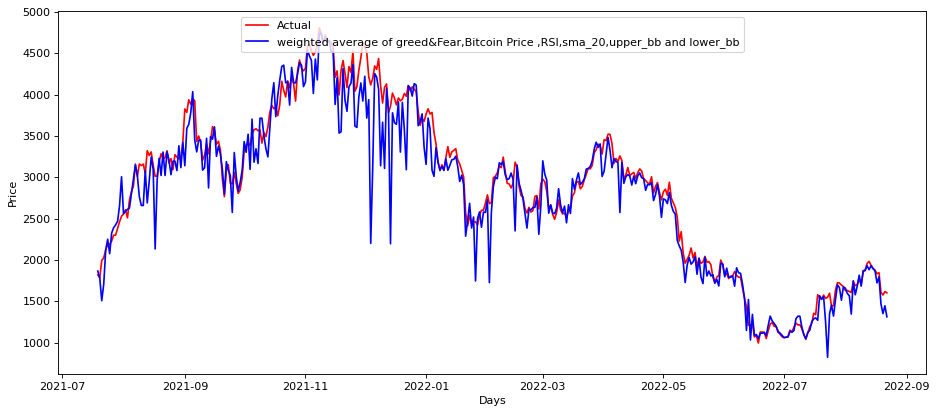

In [57]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)

line1, = plt.plot(testing_bnb['Close'], color = 'r',label="Actual")#Actual
# plt.plot(result[0], color = 'green',label="Pred")
# plt.plot(result1[0], color = 'black',label="Pred")#Prediction of Price using Fear and Greed index

# line2, = plt.plot(result2[0], color = 'orange',label="weighted average of greed&Fear and Bitcoin Price") #weighted average of greed& Fear and Bitcoin Price 
line3, = plt.plot(result3[0], color = 'blue',label="weighted average of greed&Fear,Bitcoin Price ,RSI,sma_20,upper_bb and lower_bb") #weighted average of greed& Fear , Bitcoin Price and RSI,sma_20,upper_bb,lower_bb

plt.xlabel('Days')
plt.ylabel('Price')
leg = plt.legend(loc='upper center')
plt.show()

In [58]:
from sklearn.metrics import r2_score

pred1 = DecisionTreeRegressor.predict(testing_df_close)

s1=r2_score(testing_bnb['Close'], pred1)



preds11 = regressor.predict(testing_df_close)

s=r2_score(testing_bnb['Close'], preds11)
 

preds2=RandomForestRegressor.predict(testing_df_close)
s2=r2_score(testing_bnb['Close'], preds2)

### Predicting using Lasso Regression

preds3=lasso.predict(testing_df_close)
s3=r2_score(testing_bnb['Close'], preds3)

# ### Predicting using SVR

preds4=clf.predict(testing_df_close)
s4=r2_score(testing_bnb['Close'], preds4)


## SVM

preds5=svm.predict(testing_df_close)
s5=r2_score(testing_bnb['Close'], preds5)

## Gradient Boosting Regessor 

preds6=gbr.predict(testing_df_close)
s6=r2_score(testing_bnb['Close'], preds6)

## AdaBoost Regessor 

preds7=abr.predict(testing_df_close)
s7=r2_score(testing_bnb['Close'], preds7)

##Begging  Regessor

preds8=br.predict(testing_df_close)
s8=r2_score(testing_bnb['Close'], preds8)

##voting Regressor

preds9=voting_reg.predict(testing_df_close)
s9=r2_score(testing_bnb['Close'], preds9)

##stacking Regressor

preds10=stacking_reg.predict(testing_df_close)
s10=r2_score(testing_bnb['Close'], preds10)



print("Accuracy of the Linear Regression   " + str(s))
print("Accuracy of the Decision Tree       " + str(s1))
print("Accuracy of the Random Forest       " + str(s2))
print("Accuracy of the Lasso Regression    " + str(s3))
print("Accuracy of the Ridge Regression    " + str(s4))
print("Accuracy of the Support Vector Machine  " + str(s5))
print("Accuracy of the Gradient Boosting Regessor  " + str(s6))
print("Accuracy of the AdaBoost Regessor  " + str(s7))
print("Accuracy of the Begging  Regessor  " + str(s8))
print("Accuracy of the voting   Regessor  " + str(s9))
print("Accuracy of the stacking Regessor  " + str(s10))

Accuracy of the Linear Regression   0.784478481217805
Accuracy of the Decision Tree       0.9407647092831352
Accuracy of the Random Forest       0.9253587123141737
Accuracy of the Lasso Regression    0.7844783431536506
Accuracy of the Ridge Regression    0.7844784811995273
Accuracy of the Support Vector Machine  -3.7529902307846683
Accuracy of the Gradient Boosting Regessor  0.8975003606986809
Accuracy of the AdaBoost Regessor  0.7088389135799991
Accuracy of the Begging  Regessor  0.9049988061463996
Accuracy of the voting   Regessor  0.7089265149535956
Accuracy of the stacking Regessor  0.8452034537087306


In [59]:
a=DecisionTreeRegressor.predict([[9499.360521]])
b=lasso.predict([[9499.360521]])
c=regressor.predict([[9499.360521]])
d=clf.predict([[9499.360521]])
e=RandomForestRegressor.predict([[9499.360521]])
f=gbr.predict([[9499.360521]])
e=abr.predict([[9499.360521]])
g=br.predict([[9499.360521]])
h=voting_reg.predict([[9499.360521]])
i=stacking_reg.predict([[9499.360521]])      

f=(1*a+1*b+1*c+1*d+7*e)/11

f

c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\MUHAMMAD SAAD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid 

array([[1394.54690166]])

In [60]:
df_btc.tail(10)

,Close,fng_value,pred_close,Rsi,sma_20,upper_bb,lower_bb,Weighted_Average
Time,,,,,,,,
2022-08-13,24441.38,54,1983.55,58.117063,1705.8640,1985.142654,1426.585346,10196.477005
2022-08-14,24305.24,44,1935.31,60.763458,1730.5900,1998.383098,1462.796902,10154.961804
2022-08-15,24094.82,30,1899.06,58.461305,1753.0870,1995.735505,1510.438495,10083.160254
2022-08-16,23854.74,36,1876.67,58.945578,1765.1335,2007.173943,1523.093057,9996.880506
2022-08-17,23342.66,8,1834.25,55.052570,1770.6200,2013.756344,1527.483656,9800.005582
2022-08-18,23191.20,11,1846.39,55.522683,1776.8555,2021.101247,1532.609753,9744.896591
2022-08-19,20834.39,24,1609.01,31.810728,1772.4560,2025.760072,1519.151928,8835.576671
2022-08-20,21140.07,40,1576.04,36.580336,1767.3520,2032.496638,1502.207362,8952.387872
2022-08-21,21515.61,15,1618.13,38.005270,1766.7445,2033.263608,1500.225392,9094.732482
